In [1]:
import os, json
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import tikzplotlib

color0 = "#163D5C"
color1 = "#B1CCE3"
color2 = "#3AA99F"
color3 = "#EECF5A"
color4 = "#E65239"
color5 = "#B81F1F"
color6 = "#2368A2"

figures_dir = "../../figures/slme"

from monty.json import MontyEncoder, MontyDecoder
from vscworkflows.tools.optics import DielTensor, SolarCell

In [2]:
data_dict = {
    "AgGaSe2": {"bandgaps": [0.84, 1.41]},
    "AgGaTe2": {"bandgaps": [0.46, 0.95]},
    "AgInS2": {"bandgaps": [1.20, 1.69]},
    "AgInTe2": {"bandgaps": [0.53, 0.92]},
    "CuGaS2": {"bandgaps": [1.77, 1.94]},
    "CuGaSe2": {"bandgaps": [0.96, 1.19]},
    "CuGaTe2": {"bandgaps": [0.77, 1.06]},
    "CuInS2": {"bandgaps": [1.14, 1.13]},
    "CuInSe2": {"bandgaps": [0.59, 0.58]},
    "CuInTe2": {"bandgaps": [0.76, 0.94]},
}

In [3]:
solarcells = []

for compound in data_dict.keys():
    print(compound)
    try:
        diel = DielTensor.from_file(
            "data/CuAu/" + compound + "_#115/OUTCAR_DIEL"
        )
        diel.shift_imaginary(np.diff(data_dict[compound]["bandgaps"])[0])
        data_dict[compound]["solarcell"] = SolarCell(
            diel, [data_dict[compound]["bandgaps"][1]] * 2
        )
        
    except Exception as e:
        print(e)

AgGaSe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


AgGaTe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


AgInS2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


AgInTe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


CuGaS2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


CuGaSe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


cannot reshape array of size 2001 into shape (2000,1,1)
CuGaTe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


CuInS2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


CuInSe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


CuInTe2


/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:378: DeprecationWarning: frequencies is deprecated
frequencies has been renamed to dielectric_energies.
  return cls(outcar.frequencies, outcar.dielectric_tensor_function)


In [4]:
with open("data/solar.json", "r") as file:
    solar_data = json.loads(file.read(), cls=MontyDecoder)
    
solar_CuGaSe2 = solar_data["115-CuGaSe2"]["solar"]
solar_CuGaSe2.shift_bandgap_to(1.19)
solar_CuInSe2 = SolarCell.from_file("data/CuInSe2_nedos6000.xml")
solar_CuInSe2.shift_bandgap_to(0.58)

/Users/mbercx/miniconda3/envs/vsc/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:155: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn('Float overflow (*******) encountered in vasprun')


In [5]:
data_dict["CuGaSe2"]["solarcell"] = solar_CuGaSe2
data_dict["CuInSe2"]["solarcell"] = solar_CuInSe2

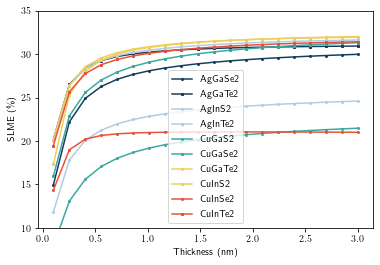

In [9]:
fig, ax = plt.subplots()

thickness = np.linspace(100e-9, 3000e-9, 20)

markers = [
    {"marker": "o", "color": color0},
    {"marker": "s", "color": color0},
    {"marker": "o", "color": color1},
    {"marker": "s", "color": color1},
    {"marker": "o", "color": color2},
    {"marker": "s", "color": color2},
    {"marker": "o", "color": color3},
    {"marker": "s", "color": color3},
    {"marker": "o", "color": color4},
    {"marker": "s", "color": color4},
]

for data, marker in zip(data_dict.values(), markers):
    
    slme_data = np.array(
        [data["solarcell"].slme(thickness=d, cut_abs_below_bandgap=True, temperature=300)[0] 
         for d in thickness]
    )
    ax.plot(thickness * 1e6, slme_data * 1e2, markersize=2, **marker)

ax.set_xlabel(r"Thickness (nm)")
ax.set_ylim([10, 35])
ax.set_ylabel(r"SLME (\%)")
ax.legend(list(data_dict.keys()))

tikzplotlib.save(filepath=os.path.join(figures_dir, "CuAu_thickness_data.tex"), 
                 add_axis_environment=False)

In [7]:
chalco_data_dict = {
    "AgGaSe2": {"bandgap": 1.80, "slme": 15.8},
    "AgGaTe2": {"bandgap": 1.71, "slme": 21.8},
    "AgInS2": {"bandgap": 1.74, "slme": 19.7},
    "AgInTe2": {"bandgap": 1.23, "slme": 26.4},
    "CuGaS2": {"bandgap": 1.99, "slme": 16.5},
    "CuGaSe2": {"bandgap": 1.46, "slme": 26.6},
    "CuGaTe2": {"bandgap": 1.47, "slme": 24.8},
    "CuInS2": {"bandgap": 1.05, "slme": 23.1},
    "CuInSe2": {"bandgap": 0.66, "slme": 22.1},
    "CuInTe2": {"bandgap": 1.03, "slme": 28.0},
}
chalco_data_dict_zunger = {
    "AgGaSe2": {"bandgap": 1.80, "slme": 15.8},
    "AgGaTe2": {"bandgap": 1.54, "slme": 21.8},
    "AgInS2": {"bandgap": 1.74, "slme": 19.7},
    "AgInTe2": {"bandgap": 1.23, "slme": 26.4},
    "CuGaS2": {"bandgap": 1.99, "slme": 16.5},
    "CuGaSe2": {"bandgap": 1.65, "slme": 26.6},
    "CuGaTe2": {"bandgap": 1.47, "slme": 24.8},
    "CuInS2": {"bandgap": 1.54, "slme": 23.1},
    "CuInSe2": {"bandgap": 1.33, "slme": 22.1},
    "CuInTe2": {"bandgap": 1.03, "slme": 28.0},
}
cuau_data_dict = {
    "AgGaSe2": {"bandgap": 1.41, "slme": 27.0},
    "AgGaTe2": {"bandgap": 0.95, "slme": 28.9},
    "AgInS2": {"bandgap": 1.69, "slme": 23.1},
    "AgInTe2": {"bandgap": 0.92, "slme": 28.2},
    "CuGaS2": {"bandgap": 1.94, "slme": 16.4},
    "CuGaSe2": {"bandgap": 1.19, "slme": 27.8},
    "CuGaTe2": {"bandgap": 1.06, "slme": 28.9},
    "CuInS2": {"bandgap": 1.13, "slme": 29.0},
    "CuInSe2": {"bandgap": 0.58, "slme": 20.7},
    "CuInTe2": {"bandgap": 0.94, "slme": 27.9},
}

In [8]:
bandgaps = np.linspace(0.3, 3, 100)
sq_limit = np.array([SolarCell.sq(bg)[0] for bg in bandgaps])

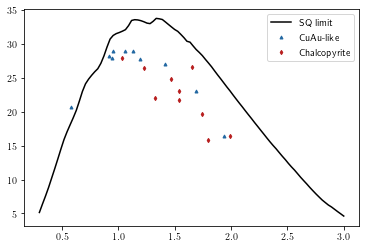

In [17]:
color0 = "#B81F1F"
color1 = "#2368A2"

plt.plot(bandgaps, sq_limit * 1e2, "k")
plt.plot(
    [data["bandgap"] for data in cuau_data_dict.values()],
    [data["slme"] for data in cuau_data_dict.values()], 
    marker="^", color=color1, linestyle="", markersize=3,
)
plt.plot(
    [data["bandgap"] for data in chalco_data_dict_zunger.values()],
    [data["slme"] for data in chalco_data_dict_zunger.values()], 
    marker="d", color=color0, linestyle="", markersize=3,
)
plt.legend(["SQ limit", "CuAu-like", "Chalcopyrite"])
tikzplotlib.save(filepath=os.path.join(figures_dir, "slme_data.tex"), 
                 add_axis_environment=False)

In [10]:
cuau_data_dict2 = {
    compound: {"bandgap": data["bandgaps"][1], 
               "slme": round(data["solarcell"].slme(thickness=5e-7, temperature=300)[0] * 1e2, 1)} 
    for compound, data in data_dict.items()
}

cuau_data_dict2

/Users/mbercx/Dropbox/python/develop/vsc-workflows/vscworkflows/tools/optics.py:707: UserWarning: Found non-zero absorption below the direct band gap. This may be an indication that the imaginary part of the dielectric function was smeared by the VASP calculation.
  warnings.warn("Found non-zero absorption below the direct band gap. "


{'AgGaSe2': {'bandgap': 1.41, 'slme': 25.9},
 'AgGaTe2': {'bandgap': 0.95, 'slme': 29.0},
 'AgInS2': {'bandgap': 1.69, 'slme': 20.9},
 'AgInTe2': {'bandgap': 0.92, 'slme': 29.0},
 'CuGaS2': {'bandgap': 1.94, 'slme': 16.6},
 'CuGaSe2': {'bandgap': 1.19, 'slme': 26.6},
 'CuGaTe2': {'bandgap': 1.06, 'slme': 28.1},
 'CuInS2': {'bandgap': 1.13, 'slme': 28.9},
 'CuInSe2': {'bandgap': 0.58, 'slme': 20.5},
 'CuInTe2': {'bandgap': 0.94, 'slme': 28.5}}

In [11]:
data_dict["CuInSe2"]

{'bandgaps': [0.59, 0.58],
 'solarcell': <vscworkflows.tools.optics.SolarCell at 0x1329c2100>}